# Tutorial 1: Basic Weight Initialization Distributions

[![Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/chaobrain/braintools/blob/main/docs/init_tutorial_01_basic_distributions.ipynb)

This tutorial introduces the fundamental weight initialization distributions available in BrainTools. Weight initialization is crucial for training neural networks effectively, as poor initialization can lead to vanishing/exploding gradients, slow convergence, or inability to learn.

## Topics Covered

1. **Introduction to weight initialization**
2. **Constant, Uniform, and Normal distributions**
3. **Statistical distributions**: LogNormal, Gamma, Exponential, Weibull, Beta
4. **TruncatedNormal** for bounded weights
5. **Practical examples** with brainunit quantities
6. **When to use** each distribution type

## Installation and Setup

In [1]:
# Install braintools if needed
# !pip install braintools brainunit matplotlib numpy

In [2]:
import brainunit as u
import matplotlib.pyplot as plt
import numpy as np

from braintools import init

# Set random seed for reproducibility
rng = np.random.default_rng(42)

# Configure matplotlib
plt.rcParams['figure.figsize'] = (12, 4)
plt.rcParams['font.size'] = 10

## 1. Introduction to Weight Initialization

Weight initialization is the process of setting initial values for the parameters (weights and biases) of a neural network before training begins. Proper initialization is critical because:

- **Prevents gradient problems**: Avoids vanishing or exploding gradients
- **Speeds up convergence**: Helps the network learn faster
- **Improves final performance**: Can lead to better local minima
- **Maintains signal flow**: Keeps activations in useful ranges

### Key Considerations

1. **Scale**: Weights should be neither too large nor too small
2. **Symmetry breaking**: Different neurons should have different initial weights
3. **Distribution shape**: Different distributions suit different network architectures
4. **Physical units**: In neuroscience, weights often represent physical quantities (conductances, currents, etc.)

## 2. Basic Distributions: Constant, Uniform, and Normal

### 2.1 Constant Initialization

The simplest initialization strategy sets all weights to the same value. While useful for biases, it's generally **not recommended for weights** because it breaks symmetry - all neurons in a layer would compute the same function.

Constant initialization:
  Shape: (100,)
  Value: 0.5 * nsiemens
  Unit: nS
  All equal: True


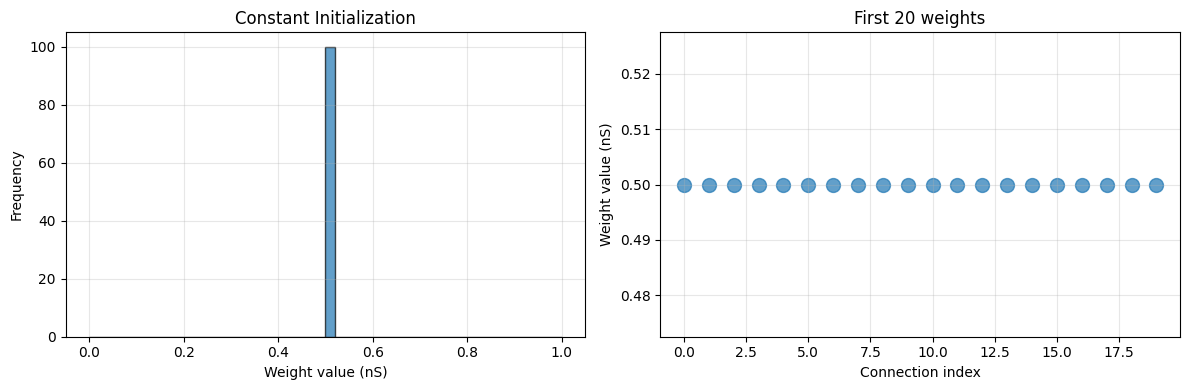


⚠️ Note: Constant initialization breaks symmetry and is rarely used for weights!


In [3]:
# Create a constant initializer with physical units
constant_init = init.Constant(0.5 * u.nS)  # nanosiemens (conductance)

# Generate weights for 100 connections
weights = constant_init(100)

print(f"Constant initialization:")
print(f"  Shape: {weights.shape}")
print(f"  Value: {weights[0]}")
print(f"  Unit: {weights.unit}")
print(f"  All equal: {np.all(weights == weights[0])}")

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].hist(weights.mantissa, bins=50, alpha=0.7, edgecolor='black')
axes[0].set_xlabel(f'Weight value ({weights.unit})')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Constant Initialization')
axes[0].grid(alpha=0.3)

axes[1].scatter(range(20), weights[:20].mantissa, s=100, alpha=0.7)
axes[1].set_xlabel('Connection index')
axes[1].set_ylabel(f'Weight value ({weights.unit})')
axes[1].set_title('First 20 weights')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\n⚠️ Note: Constant initialization breaks symmetry and is rarely used for weights!")

### 2.2 Uniform Distribution

Uniform distribution generates weights with equal probability across a range [low, high). This is better than constant initialization as it breaks symmetry.

**Use cases:**
- Simple baseline initialization
- When you want bounded weights
- Embedding layers

Uniform initialization:
  Shape: (1000,)
  Min: 0.101 * nsiemens
  Max: 0.999 * nsiemens
  Mean: 0.547 * nsiemens
  Std: 0.262 * nsiemens


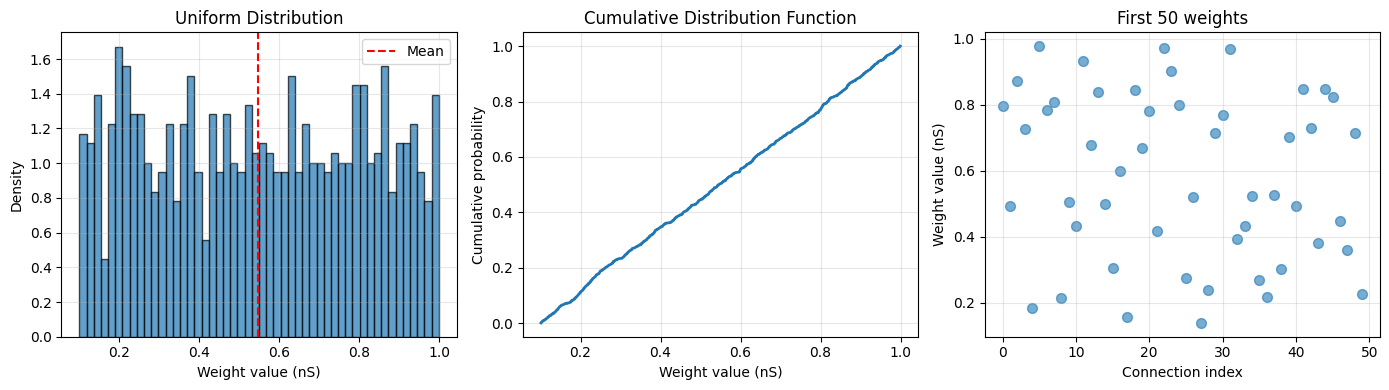

In [4]:
# Create uniform initializer
uniform_init = init.Uniform(low=0.1 * u.nS, high=1.0 * u.nS)

# Generate weights
weights = uniform_init(1000, rng=rng)

print(f"Uniform initialization:")
print(f"  Shape: {weights.shape}")
print(f"  Min: {weights.min():.3f}")
print(f"  Max: {weights.max():.3f}")
print(f"  Mean: {weights.mean():.3f}")
print(f"  Std: {weights.std():.3f}")

# Visualize
fig, axes = plt.subplots(1, 3, figsize=(14, 4))

# Histogram
axes[0].hist(weights.mantissa, bins=50, alpha=0.7, edgecolor='black', density=True)
axes[0].axvline(weights.mean().mantissa, color='red', linestyle='--', label='Mean')
axes[0].set_xlabel(f'Weight value ({weights.unit})')
axes[0].set_ylabel('Density')
axes[0].set_title('Uniform Distribution')
axes[0].legend()
axes[0].grid(alpha=0.3)

# CDF
sorted_weights = np.sort(weights.mantissa)
cdf = np.arange(1, len(sorted_weights) + 1) / len(sorted_weights)
axes[1].plot(sorted_weights, cdf, linewidth=2)
axes[1].set_xlabel(f'Weight value ({weights.unit})')
axes[1].set_ylabel('Cumulative probability')
axes[1].set_title('Cumulative Distribution Function')
axes[1].grid(alpha=0.3)

# Sample weights
axes[2].scatter(range(50), weights[:50].mantissa, s=50, alpha=0.6)
axes[2].set_xlabel('Connection index')
axes[2].set_ylabel(f'Weight value ({weights.unit})')
axes[2].set_title('First 50 weights')
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

### 2.3 Normal (Gaussian) Distribution

Normal distribution is one of the most common initialization strategies. It generates weights from a Gaussian with specified mean and standard deviation.

**Use cases:**
- General purpose initialization
- When combined with variance scaling (covered in Tutorial 2)
- Biological plausibility (many neural properties are normally distributed)

Normal initialization:
  Shape: (1000,)
  Min: 0.043 * nsiemens
  Max: 0.937 * nsiemens
  Mean: 0.488 * nsiemens
  Std: 0.152 * nsiemens


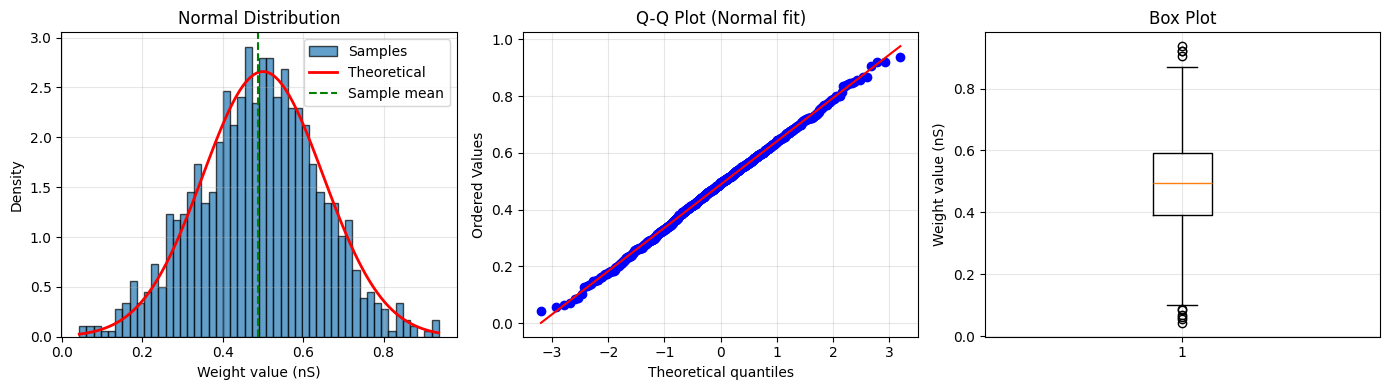

In [5]:
# Create normal initializer
normal_init = init.Normal(mean=0.5 * u.nS, std=0.15 * u.nS)

# Generate weights
weights = normal_init(1000, rng=rng)

print(f"Normal initialization:")
print(f"  Shape: {weights.shape}")
print(f"  Min: {weights.min():.3f}")
print(f"  Max: {weights.max():.3f}")
print(f"  Mean: {weights.mean():.3f}")
print(f"  Std: {weights.std():.3f}")

# Visualize
fig, axes = plt.subplots(1, 3, figsize=(14, 4))

# Histogram with theoretical curve
counts, bins, _ = axes[0].hist(weights.mantissa,
                               bins=50,
                               alpha=0.7,
                               edgecolor='black',
                               density=True,
                               label='Samples')
x = np.linspace(weights.min().mantissa, weights.max().mantissa, 100)
theoretical = (1 / (0.15 * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - 0.5) / 0.15) ** 2)
axes[0].plot(x, theoretical, 'r-', linewidth=2, label='Theoretical')
axes[0].axvline(weights.mean().mantissa, color='green', linestyle='--', label='Sample mean')
axes[0].set_xlabel(f'Weight value ({weights.unit})')
axes[0].set_ylabel('Density')
axes[0].set_title('Normal Distribution')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Q-Q plot
from scipy import stats

stats.probplot(weights.mantissa, dist="norm", plot=axes[1])
axes[1].set_title('Q-Q Plot (Normal fit)')
axes[1].grid(alpha=0.3)

# Box plot
axes[2].boxplot(weights.mantissa, vert=True)
axes[2].set_ylabel(f'Weight value ({weights.unit})')
axes[2].set_title('Box Plot')
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

### Comparing Basic Distributions

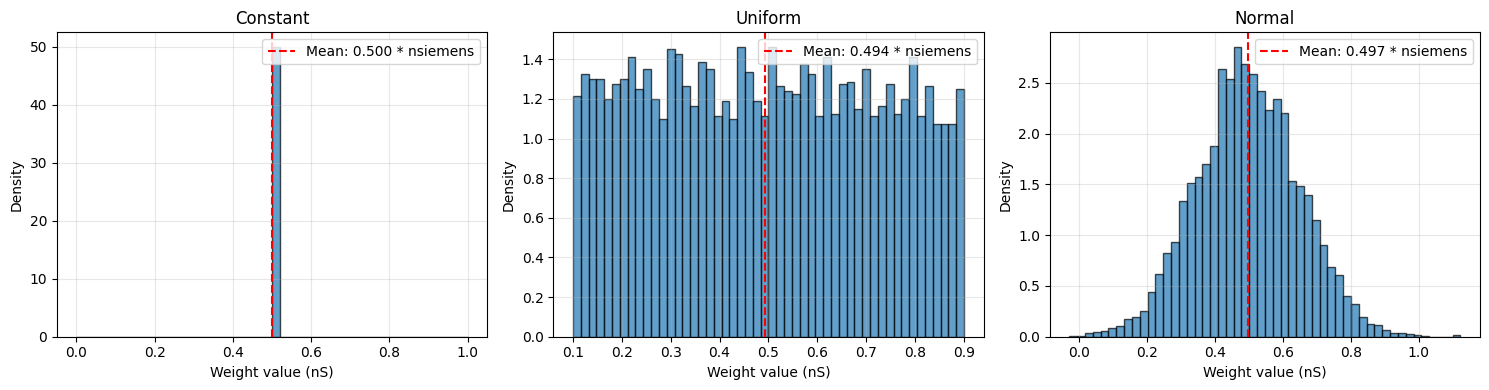


Comparison of Basic Distributions:
------------------------------------------------------------
Distribution    Mean            Std             Range
------------------------------------------------------------
Constant        0.5 * nsiemens  0. * nsiemens   [0.50 * nsiemens, 0.50 * nsiemens]
Uniform         0.49354032 * nsiemens 0.22933985 * nsiemens [0.10 * nsiemens, 0.90 * nsiemens]
Normal          0.49672538 * nsiemens 0.15104583 * nsiemens [-0.03 * nsiemens, 1.12 * nsiemens]


In [6]:
# Compare the three basic distributions
n_samples = 5000

constant_weights = init.Constant(0.5 * u.nS)(n_samples)
uniform_weights = init.Uniform(0.1 * u.nS, 0.9 * u.nS)(n_samples, rng=rng)
normal_weights = init.Normal(0.5 * u.nS, 0.15 * u.nS)(n_samples, rng=rng)

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for ax, weights, title in zip(axes,
                              [constant_weights, uniform_weights, normal_weights],
                              ['Constant', 'Uniform', 'Normal']):
    ax.hist(weights.mantissa, bins=50, alpha=0.7, edgecolor='black', density=True)
    ax.axvline(weights.mean().mantissa, color='red', linestyle='--',
               label=f'Mean: {weights.mean():.3f}')
    ax.set_xlabel(f'Weight value ({weights.unit})')
    ax.set_ylabel('Density')
    ax.set_title(title)
    ax.legend()
    ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Statistics comparison
print("\nComparison of Basic Distributions:")
print("-" * 60)
print(f"{'Distribution':<15} {'Mean':<15} {'Std':<15} {'Range'}")
print("-" * 60)
print(f"{'Constant':<15} {constant_weights.mean()!s:<15} {constant_weights.std()!s:<15} "
      f"[{constant_weights.min():.2f}, {constant_weights.max():.2f}]")
print(f"{'Uniform':<15} {uniform_weights.mean()!s:<15} {uniform_weights.std()!s:<15} "
      f"[{uniform_weights.min():.2f}, {uniform_weights.max():.2f}]")
print(f"{'Normal':<15} {normal_weights.mean()!s:<15} {normal_weights.std()!s:<15} "
      f"[{normal_weights.min():.2f}, {normal_weights.max():.2f}]")

## 3. Statistical Distributions

BrainTools provides several advanced statistical distributions that are useful for specific scenarios in neuroscience and machine learning.

### 3.1 LogNormal Distribution

LogNormal distribution generates positive values with a long tail. It's particularly useful for:
- **Synaptic weights**: Many biological measurements are log-normally distributed
- **Positive-only values**: When weights must be positive
- **Multiplicative processes**: Natural for growth/decay processes

LogNormal initialization:
  Mean: 0.511 * nsiemens
  Std: 0.202 * nsiemens
  Median: 0.473 * nsiemens
  Skewness: 1.106


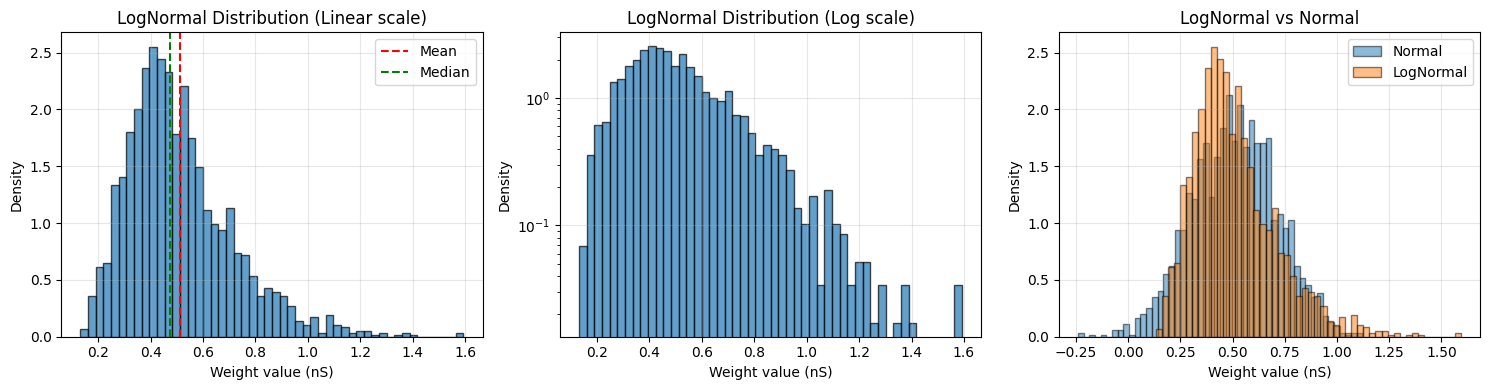

In [9]:
# Create log-normal initializer
# Note: mean and std are in LINEAR space (not log-space)
lognormal_init = init.LogNormal(mean=0.5 * u.nS, std=0.2 * u.nS)

# Generate weights
weights = lognormal_init(2000, rng=rng)

print(f"LogNormal initialization:")
print(f"  Mean: {weights.mean():.3f}")
print(f"  Std: {weights.std():.3f}")
print(f"  Median: {u.math.median(weights):.3f}")
print(f"  Skewness: {((weights.mantissa - weights.mean().mantissa) ** 3).mean() / weights.std().mantissa ** 3:.3f}")

# Visualize
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Histogram (linear scale)
axes[0].hist(weights.mantissa, bins=50, alpha=0.7, edgecolor='black', density=True)
axes[0].axvline(weights.mean().mantissa, color='red', linestyle='--', label='Mean')
axes[0].axvline(u.math.median(weights).mantissa, color='green', linestyle='--', label='Median')
axes[0].set_xlabel(f'Weight value ({weights.unit})')
axes[0].set_ylabel('Density')
axes[0].set_title('LogNormal Distribution (Linear scale)')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Histogram (log scale)
axes[1].hist(weights.mantissa, bins=50, alpha=0.7, edgecolor='black', density=True)
axes[1].set_xlabel(f'Weight value ({weights.unit})')
axes[1].set_ylabel('Density')
axes[1].set_title('LogNormal Distribution (Log scale)')
axes[1].set_yscale('log')
axes[1].grid(alpha=0.3)

# Compare with Normal
normal_weights = init.Normal(0.5 * u.nS, 0.2 * u.nS)(2000, rng=rng)
axes[2].hist(normal_weights.mantissa, bins=50, alpha=0.5,
             label='Normal', edgecolor='black', density=True)
axes[2].hist(weights.mantissa, bins=50, alpha=0.5,
             label='LogNormal', edgecolor='black', density=True)
axes[2].set_xlabel(f'Weight value ({weights.unit})')
axes[2].set_ylabel('Density')
axes[2].set_title('LogNormal vs Normal')
axes[2].legend()
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

### 3.2 Gamma Distribution

Gamma distribution is useful for positive-valued weights with controllable shape and scale.

**Use cases:**
- Modeling waiting times or intervals
- Positive weights with specific skewness
- Rate parameters in Poisson processes

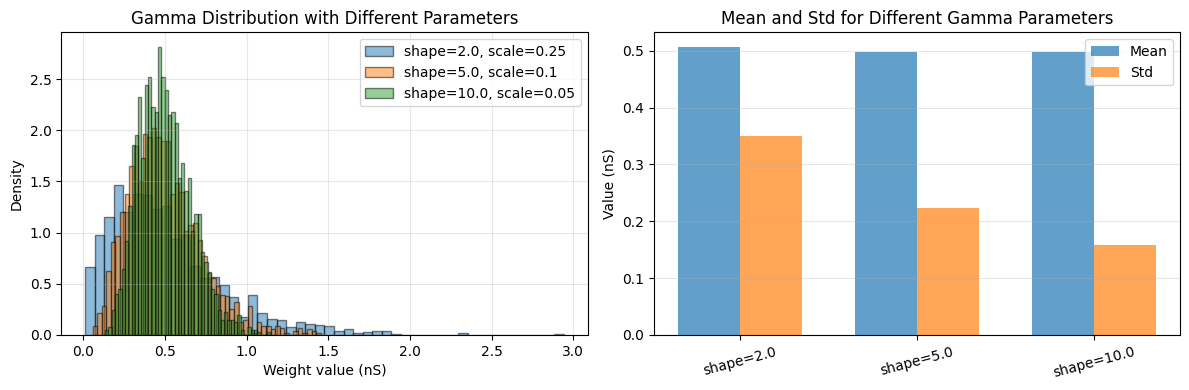


Gamma Distribution Properties:
--------------------------------------------------
shape=2.0: mean=0.507 * nsiemens, std=0.350 * nsiemens
shape=5.0: mean=0.498 * nsiemens, std=0.224 * nsiemens
shape=10.0: mean=0.499 * nsiemens, std=0.159 * nsiemens


In [10]:
# Create gamma initializers with different parameters
gamma_init_1 = init.Gamma(shape=2.0, scale=0.25 * u.nS)
gamma_init_2 = init.Gamma(shape=5.0, scale=0.1 * u.nS)
gamma_init_3 = init.Gamma(shape=10.0, scale=0.05 * u.nS)

# Generate weights
weights_1 = gamma_init_1(2000, rng=rng)
weights_2 = gamma_init_2(2000, rng=rng)
weights_3 = gamma_init_3(2000, rng=rng)

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Overlay different gamma distributions
axes[0].hist(weights_1.mantissa, bins=50, alpha=0.5, label='shape=2.0, scale=0.25',
             density=True, edgecolor='black')
axes[0].hist(weights_2.mantissa, bins=50, alpha=0.5, label='shape=5.0, scale=0.1',
             density=True, edgecolor='black')
axes[0].hist(weights_3.mantissa, bins=50, alpha=0.5, label='shape=10.0, scale=0.05',
             density=True, edgecolor='black')
axes[0].set_xlabel(f'Weight value ({weights_1.unit})')
axes[0].set_ylabel('Density')
axes[0].set_title('Gamma Distribution with Different Parameters')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Statistics comparison
distributions = ['shape=2.0', 'shape=5.0', 'shape=10.0']
means = [weights_1.mean().mantissa, weights_2.mean().mantissa, weights_3.mean().mantissa]
stds = [weights_1.std().mantissa, weights_2.std().mantissa, weights_3.std().mantissa]

x = np.arange(len(distributions))
width = 0.35
axes[1].bar(x - width / 2, means, width, label='Mean', alpha=0.7)
axes[1].bar(x + width / 2, stds, width, label='Std', alpha=0.7)
axes[1].set_ylabel(f'Value ({weights_1.unit})')
axes[1].set_title('Mean and Std for Different Gamma Parameters')
axes[1].set_xticks(x)
axes[1].set_xticklabels(distributions, rotation=15)
axes[1].legend()
axes[1].grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\nGamma Distribution Properties:")
print("-" * 50)
for i, (name, w) in enumerate(zip(distributions, [weights_1, weights_2, weights_3])):
    print(f"{name}: mean={w.mean():.3f}, std={w.std():.3f}")

### 3.3 Exponential Distribution

Exponential distribution models time between events in a Poisson process.

**Use cases:**
- Modeling decay processes
- Inter-spike intervals
- Positive weights with maximum entropy for given mean

Exponential initialization:
  Mean: 0.295 * nsiemens
  Std: 0.294 * nsiemens
  Theoretical mean: 0.3 * nsiemens
  Theoretical std: 0.3 * nsiemens


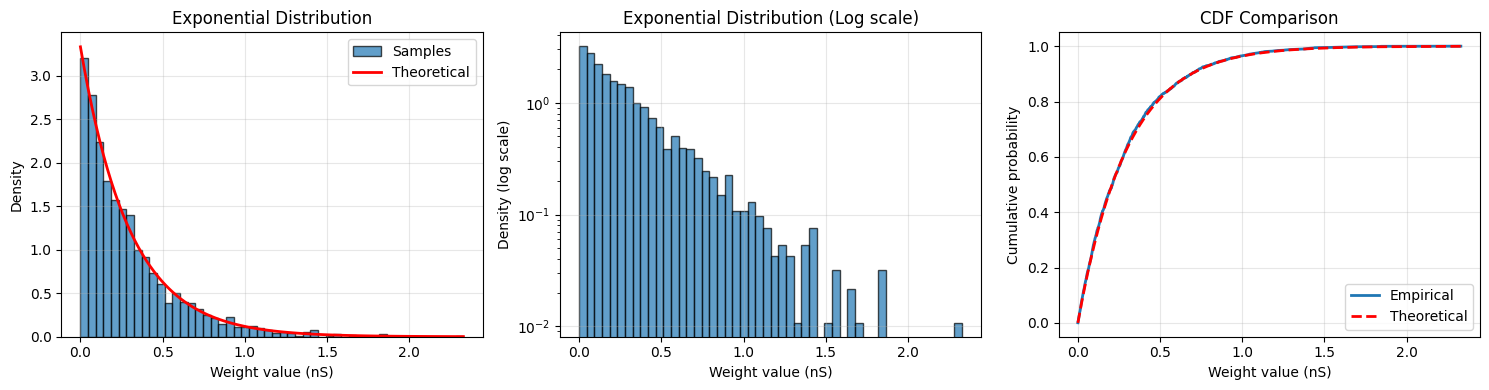

In [11]:
# Create exponential initializer
exponential_init = init.Exponential(scale=0.3 * u.nS)

# Generate weights
weights = exponential_init(2000, rng=rng)

print(f"Exponential initialization:")
print(f"  Mean: {weights.mean():.3f}")
print(f"  Std: {weights.std():.3f}")
print(f"  Theoretical mean: {0.3 * u.nS}")
print(f"  Theoretical std: {0.3 * u.nS}")

# Visualize
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Histogram with theoretical curve
counts, bins, _ = axes[0].hist(weights.mantissa, bins=50, alpha=0.7,
                               edgecolor='black', density=True, label='Samples')
x = np.linspace(0, weights.max().mantissa, 100)
theoretical = (1 / 0.3) * np.exp(-x / 0.3)
axes[0].plot(x, theoretical, 'r-', linewidth=2, label='Theoretical')
axes[0].set_xlabel(f'Weight value ({weights.unit})')
axes[0].set_ylabel('Density')
axes[0].set_title('Exponential Distribution')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Log scale histogram
axes[1].hist(weights.mantissa, bins=50, alpha=0.7, edgecolor='black', density=True)
axes[1].set_xlabel(f'Weight value ({weights.unit})')
axes[1].set_ylabel('Density (log scale)')
axes[1].set_title('Exponential Distribution (Log scale)')
axes[1].set_yscale('log')
axes[1].grid(alpha=0.3)

# Cumulative distribution
sorted_weights = np.sort(weights.mantissa)
cdf = np.arange(1, len(sorted_weights) + 1) / len(sorted_weights)
theoretical_cdf = 1 - np.exp(-sorted_weights / 0.3)
axes[2].plot(sorted_weights, cdf, label='Empirical', linewidth=2)
axes[2].plot(sorted_weights, theoretical_cdf, 'r--', label='Theoretical', linewidth=2)
axes[2].set_xlabel(f'Weight value ({weights.unit})')
axes[2].set_ylabel('Cumulative probability')
axes[2].set_title('CDF Comparison')
axes[2].legend()
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

### 3.4 Weibull Distribution

Weibull distribution is a generalization of the exponential distribution with an additional shape parameter.

**Use cases:**
- Modeling failure rates or lifetimes
- Flexible shape for positive-valued weights
- When you need more control than exponential

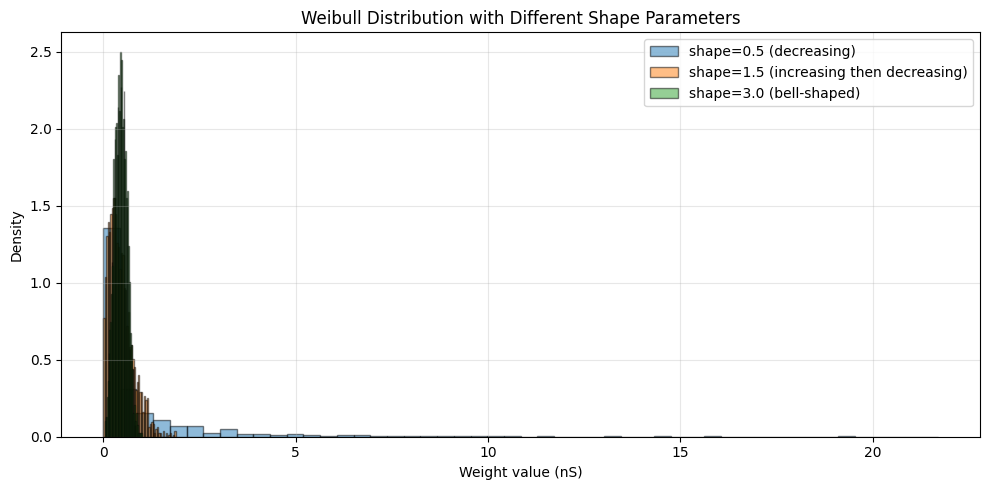


Weibull Distribution Shape Effects:
------------------------------------------------------------
shape < 1: High failure rate early, then decreasing
shape = 1: Constant failure rate (exponential distribution)
shape > 1: Failure rate increases over time


In [12]:
# Create Weibull initializers with different shapes
weibull_init_1 = init.Weibull(shape=0.5, scale=0.5 * u.nS)
weibull_init_2 = init.Weibull(shape=1.5, scale=0.5 * u.nS)
weibull_init_3 = init.Weibull(shape=3.0, scale=0.5 * u.nS)

# Generate weights
weights_1 = weibull_init_1(2000, rng=rng)
weights_2 = weibull_init_2(2000, rng=rng)
weights_3 = weibull_init_3(2000, rng=rng)

# Visualize
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.hist(weights_1.mantissa, bins=50, alpha=0.5, label='shape=0.5 (decreasing)',
        density=True, edgecolor='black')
ax.hist(weights_2.mantissa, bins=50, alpha=0.5, label='shape=1.5 (increasing then decreasing)',
        density=True, edgecolor='black')
ax.hist(weights_3.mantissa, bins=50, alpha=0.5, label='shape=3.0 (bell-shaped)',
        density=True, edgecolor='black')
ax.set_xlabel(f'Weight value ({weights_1.unit})')
ax.set_ylabel('Density')
ax.set_title('Weibull Distribution with Different Shape Parameters')
ax.legend()
ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\nWeibull Distribution Shape Effects:")
print("-" * 60)
print("shape < 1: High failure rate early, then decreasing")
print("shape = 1: Constant failure rate (exponential distribution)")
print("shape > 1: Failure rate increases over time")

### 3.5 Beta Distribution

Beta distribution generates values in a bounded range [0, 1] (or rescaled to [low, high]). It's extremely flexible with two shape parameters.

**Use cases:**
- Bounded weights (e.g., probabilities, proportions)
- Flexible shapes (uniform, U-shaped, bell-shaped, J-shaped)
- Modeling ratios or percentages

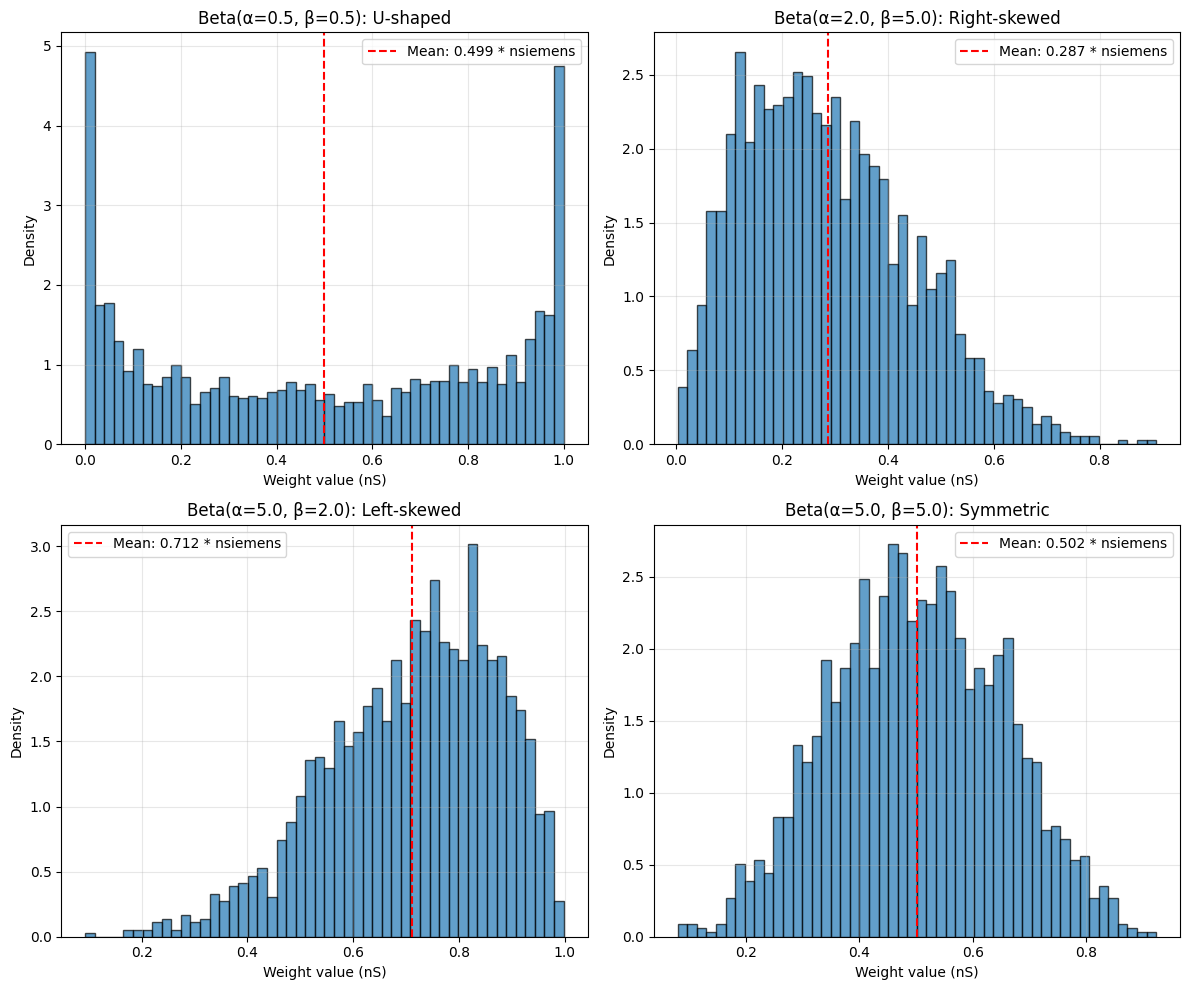


Beta Distribution Shape Guide:
------------------------------------------------------------
α < 1, β < 1: U-shaped (high at boundaries)
α < 1, β ≥ 1: J-shaped (decreasing from 0)
α ≥ 1, β < 1: Reverse J-shaped (increasing to 1)
α = β: Symmetric around 0.5
α > β: Left-skewed (peak towards 1)
α < β: Right-skewed (peak towards 0)


In [13]:
# Create Beta initializers with different parameters
beta_init_1 = init.Beta(alpha=0.5, beta=0.5, low=0.0 * u.nS, high=1.0 * u.nS)  # U-shaped
beta_init_2 = init.Beta(alpha=2.0, beta=5.0, low=0.0 * u.nS, high=1.0 * u.nS)  # Right-skewed
beta_init_3 = init.Beta(alpha=5.0, beta=2.0, low=0.0 * u.nS, high=1.0 * u.nS)  # Left-skewed
beta_init_4 = init.Beta(alpha=5.0, beta=5.0, low=0.0 * u.nS, high=1.0 * u.nS)  # Symmetric

# Generate weights
weights_1 = beta_init_1(2000, rng=rng)
weights_2 = beta_init_2(2000, rng=rng)
weights_3 = beta_init_3(2000, rng=rng)
weights_4 = beta_init_4(2000, rng=rng)

# Visualize
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

params = [(0.5, 0.5, 'U-shaped'), (2.0, 5.0, 'Right-skewed'),
          (5.0, 2.0, 'Left-skewed'), (5.0, 5.0, 'Symmetric')]
weights_list = [weights_1, weights_2, weights_3, weights_4]

for ax, (alpha, beta, name), weights in zip(axes, params, weights_list):
    ax.hist(weights.mantissa, bins=50, alpha=0.7, edgecolor='black', density=True)
    ax.axvline(weights.mean().mantissa, color='red', linestyle='--',
               label=f'Mean: {weights.mean():.3f}')
    ax.set_xlabel(f'Weight value ({weights.unit})')
    ax.set_ylabel('Density')
    ax.set_title(f'Beta(α={alpha}, β={beta}): {name}')
    ax.legend()
    ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\nBeta Distribution Shape Guide:")
print("-" * 60)
print("α < 1, β < 1: U-shaped (high at boundaries)")
print("α < 1, β ≥ 1: J-shaped (decreasing from 0)")
print("α ≥ 1, β < 1: Reverse J-shaped (increasing to 1)")
print("α = β: Symmetric around 0.5")
print("α > β: Left-skewed (peak towards 1)")
print("α < β: Right-skewed (peak towards 0)")

## 4. TruncatedNormal Distribution

TruncatedNormal is a normal distribution cut off at specified bounds. This is particularly useful when you want Gaussian properties but need to ensure weights stay within a specific range.

**Use cases:**
- Bounded weights with Gaussian-like properties
- Preventing extreme outliers
- Physical constraints (e.g., conductances must be positive)

TruncatedNormal initialization:
  Mean: 0.505 * nsiemens
  Std: 0.196 * nsiemens
  Min: 0.014 * nsiemens
  Max: 0.997 * nsiemens

Regular Normal (for comparison):
  Mean: 0.503 * nsiemens
  Std: 0.199 * nsiemens
  Min: -0.278 * nsiemens
  Max: 1.139 * nsiemens
  Values outside [0, 1]: 30


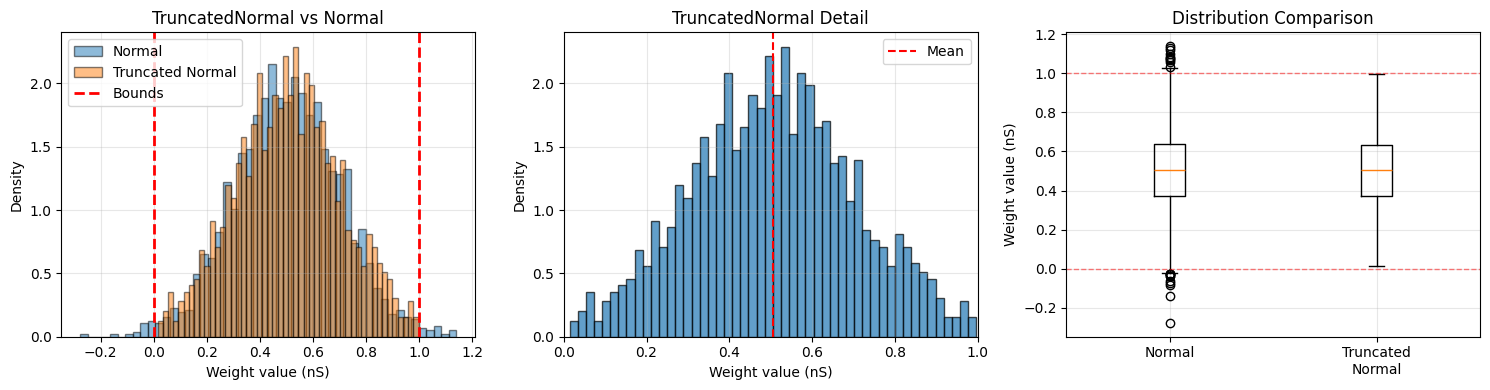

In [15]:
# Create truncated normal initializer
truncated_init = init.TruncatedNormal(
    mean=0.5 * u.nS,
    std=0.2 * u.nS,
    low=0.0 * u.nS,
    high=1.0 * u.nS
)

# Generate weights
truncated_weights = truncated_init(2000, rng=rng)

# Compare with regular normal
normal_init = init.Normal(mean=0.5 * u.nS, std=0.2 * u.nS)
normal_weights = normal_init(2000, rng=rng)

print(f"TruncatedNormal initialization:")
print(f"  Mean: {truncated_weights.mean():.3f}")
print(f"  Std: {truncated_weights.std():.3f}")
print(f"  Min: {truncated_weights.min():.3f}")
print(f"  Max: {truncated_weights.max():.3f}")
print(f"\nRegular Normal (for comparison):")
print(f"  Mean: {normal_weights.mean():.3f}")
print(f"  Std: {normal_weights.std():.3f}")
print(f"  Min: {normal_weights.min():.3f}")
print(f"  Max: {normal_weights.max():.3f}")
print(f"  Values outside [0, 1]: {np.sum((normal_weights.mantissa < 0) | (normal_weights.mantissa > 1))}")

# Visualize
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Comparison histogram
axes[0].hist(normal_weights.mantissa, bins=50, alpha=0.5, label='Normal',
             density=True, edgecolor='black')
axes[0].hist(truncated_weights.mantissa, bins=50, alpha=0.5, label='Truncated Normal',
             density=True, edgecolor='black')
axes[0].axvline(0.0, color='red', linestyle='--', linewidth=2, label='Bounds')
axes[0].axvline(1.0, color='red', linestyle='--', linewidth=2)
axes[0].set_xlabel(f'Weight value ({truncated_weights.unit})')
axes[0].set_ylabel('Density')
axes[0].set_title('TruncatedNormal vs Normal')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Zoom in on truncated region
axes[1].hist(truncated_weights.mantissa, bins=50, alpha=0.7, edgecolor='black', density=True)
axes[1].axvline(truncated_weights.mean().mantissa, color='red', linestyle='--', label='Mean')
axes[1].set_xlabel(f'Weight value ({truncated_weights.unit})')
axes[1].set_ylabel('Density')
axes[1].set_title('TruncatedNormal Detail')
axes[1].set_xlim([0, 1])
axes[1].legend()
axes[1].grid(alpha=0.3)

# Box plot comparison
axes[2].boxplot([normal_weights.mantissa, truncated_weights.mantissa],
                tick_labels=['Normal', 'Truncated\nNormal'])
axes[2].axhline(0.0, color='red', linestyle='--', linewidth=1, alpha=0.5)
axes[2].axhline(1.0, color='red', linestyle='--', linewidth=1, alpha=0.5)
axes[2].set_ylabel(f'Weight value ({truncated_weights.unit})')
axes[2].set_title('Distribution Comparison')
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

### Effect of Truncation Bounds

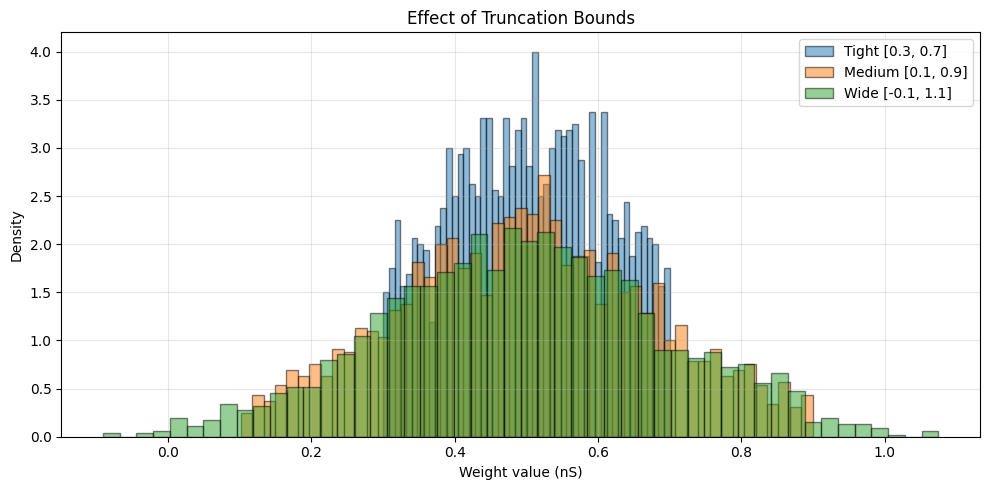


Effect of Truncation Bounds:
------------------------------------------------------------
Tight [0.3, 0.7]:   mean=0.503 * nsiemens, std=0.105 * nsiemens
Medium [0.1, 0.9]:  mean=0.498 * nsiemens, std=0.175 * nsiemens
Wide [-0.1, 1.1]:   mean=0.497 * nsiemens, std=0.196 * nsiemens

Note: Tighter bounds reduce variance and shift the mean toward the center of the truncation range.


In [16]:
# Compare different truncation bounds
truncated_tight = init.TruncatedNormal(0.5 * u.nS, 0.2 * u.nS,
                                       0.3 * u.nS, 0.7 * u.nS)(2000, rng=rng)
truncated_medium = init.TruncatedNormal(0.5 * u.nS, 0.2 * u.nS,
                                        0.1 * u.nS, 0.9 * u.nS)(2000, rng=rng)
truncated_wide = init.TruncatedNormal(0.5 * u.nS, 0.2 * u.nS,
                                      -0.1 * u.nS, 1.1 * u.nS)(2000, rng=rng)

fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.hist(truncated_tight.mantissa, bins=50, alpha=0.5,
        label='Tight [0.3, 0.7]', density=True, edgecolor='black')
ax.hist(truncated_medium.mantissa, bins=50, alpha=0.5,
        label='Medium [0.1, 0.9]', density=True, edgecolor='black')
ax.hist(truncated_wide.mantissa, bins=50, alpha=0.5,
        label='Wide [-0.1, 1.1]', density=True, edgecolor='black')
ax.set_xlabel(f'Weight value ({truncated_tight.unit})')
ax.set_ylabel('Density')
ax.set_title('Effect of Truncation Bounds')
ax.legend()
ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\nEffect of Truncation Bounds:")
print("-" * 60)
print(f"Tight [0.3, 0.7]:   mean={truncated_tight.mean():.3f}, std={truncated_tight.std():.3f}")
print(f"Medium [0.1, 0.9]:  mean={truncated_medium.mean():.3f}, std={truncated_medium.std():.3f}")
print(f"Wide [-0.1, 1.1]:   mean={truncated_wide.mean():.3f}, std={truncated_wide.std():.3f}")
print("\nNote: Tighter bounds reduce variance and shift the mean toward the center of the truncation range.")

## 5. Practical Examples with BrainUnit Quantities

Let's explore how to use these initializers in realistic neuroscience scenarios with physical units.

### Example 1: Excitatory and Inhibitory Synaptic Conductances

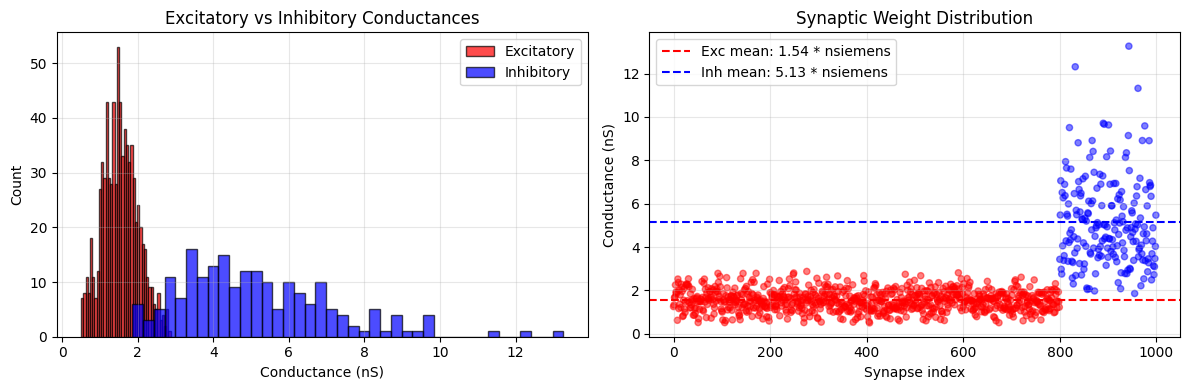

Excitatory synapses (n=800):
  Mean: 1.539 * nsiemens
  Std: 0.470 * nsiemens
  Range: [0.50 * nsiemens, 2.87 * nsiemens]

Inhibitory synapses (n=200):
  Mean: 5.132 * nsiemens
  Std: 2.015 * nsiemens
  Range: [1.86 * nsiemens, 13.26 * nsiemens]


In [17]:
# Excitatory synapses: typically 0.5-3.0 nS
excitatory_init = init.TruncatedNormal(
    mean=1.5 * u.nS,
    std=0.5 * u.nS,
    low=0.5 * u.nS,
    high=3.0 * u.nS
)

# Inhibitory synapses: typically 2-10 nS (stronger)
inhibitory_init = init.LogNormal(
    mean=5.0 * u.nS,
    std=2.0 * u.nS
)

# Generate synaptic weights
n_excitatory = 800
n_inhibitory = 200

exc_weights = excitatory_init(n_excitatory, rng=rng)
inh_weights = inhibitory_init(n_inhibitory, rng=rng)

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].hist(exc_weights.mantissa, bins=40, alpha=0.7, label='Excitatory',
             edgecolor='black', color='red')
axes[0].hist(inh_weights.mantissa, bins=40, alpha=0.7, label='Inhibitory',
             edgecolor='black', color='blue')
axes[0].set_xlabel(f'Conductance ({exc_weights.unit})')
axes[0].set_ylabel('Count')
axes[0].set_title('Excitatory vs Inhibitory Conductances')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Create connection matrix visualization
all_weights = np.concatenate([exc_weights.mantissa, inh_weights.mantissa])
colors = ['red'] * n_excitatory + ['blue'] * n_inhibitory
axes[1].scatter(range(len(all_weights)), all_weights, c=colors, alpha=0.5, s=20)
axes[1].axhline(exc_weights.mean().mantissa, color='red', linestyle='--',
                label=f'Exc mean: {exc_weights.mean():.2f}')
axes[1].axhline(inh_weights.mean().mantissa, color='blue', linestyle='--',
                label=f'Inh mean: {inh_weights.mean():.2f}')
axes[1].set_xlabel('Synapse index')
axes[1].set_ylabel(f'Conductance ({exc_weights.unit})')
axes[1].set_title('Synaptic Weight Distribution')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Excitatory synapses (n={n_excitatory}):")
print(f"  Mean: {exc_weights.mean():.3f}")
print(f"  Std: {exc_weights.std():.3f}")
print(f"  Range: [{exc_weights.min():.2f}, {exc_weights.max():.2f}]")
print(f"\nInhibitory synapses (n={n_inhibitory}):")
print(f"  Mean: {inh_weights.mean():.3f}")
print(f"  Std: {inh_weights.std():.3f}")
print(f"  Range: [{inh_weights.min():.2f}, {inh_weights.max():.2f}]")

### Example 2: Spike Rate Parameters

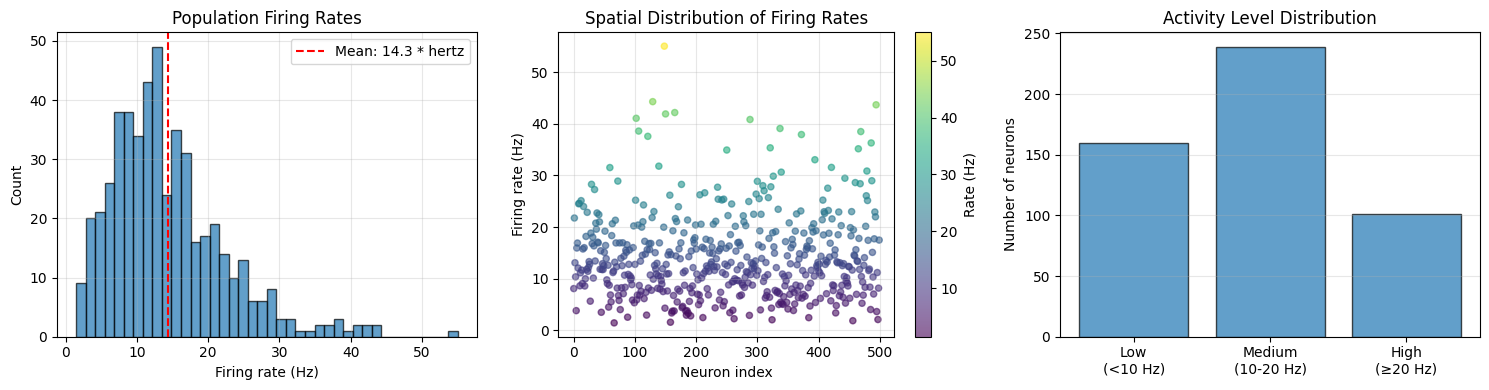

Firing rate statistics:
  Mean: 14.31 * hertz
  Median: 12.78 * hertz
  Std: 8.10 * hertz
  Range: [1.5 * hertz, 55.0 * hertz]

Activity categories:
  Low rate: 160 neurons (32.0%)
  Medium rate: 239 neurons (47.8%)
  High rate: 101 neurons (20.2%)


In [19]:
# Firing rates typically follow Gamma or LogNormal distributions
# Using Gamma for baseline firing rates
rate_init = init.Gamma(shape=3.0, scale=5.0 * u.Hz)

# Generate firing rates for a population
n_neurons = 500
firing_rates = rate_init(n_neurons, rng=rng)

# Visualize
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Histogram
axes[0].hist(firing_rates.mantissa, bins=40, alpha=0.7, edgecolor='black')
axes[0].axvline(firing_rates.mean().mantissa, color='red', linestyle='--',
                label=f'Mean: {firing_rates.mean():.1f}')
axes[0].set_xlabel(f'Firing rate ({firing_rates.unit})')
axes[0].set_ylabel('Count')
axes[0].set_title('Population Firing Rates')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Spatial arrangement
neuron_positions = np.arange(n_neurons)
colors = firing_rates.mantissa
scatter = axes[1].scatter(neuron_positions, firing_rates.mantissa,
                          c=colors, cmap='viridis', s=20, alpha=0.6)
axes[1].set_xlabel('Neuron index')
axes[1].set_ylabel(f'Firing rate ({firing_rates.unit})')
axes[1].set_title('Spatial Distribution of Firing Rates')
plt.colorbar(scatter, ax=axes[1], label=f'Rate ({firing_rates.unit})')
axes[1].grid(alpha=0.3)

# Categorize neurons by activity level
low_rate = firing_rates.mantissa < 10
medium_rate = (firing_rates.mantissa >= 10) & (firing_rates.mantissa < 20)
high_rate = firing_rates.mantissa >= 20

categories = ['Low\n(<10 Hz)', 'Medium\n(10-20 Hz)', 'High\n(≥20 Hz)']
counts = [np.sum(low_rate), np.sum(medium_rate), np.sum(high_rate)]
axes[2].bar(categories, counts, alpha=0.7, edgecolor='black')
axes[2].set_ylabel('Number of neurons')
axes[2].set_title('Activity Level Distribution')
axes[2].grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print(f"Firing rate statistics:")
print(f"  Mean: {firing_rates.mean():.2f}")
print(f"  Median: {u.math.median(firing_rates):.2f}")
print(f"  Std: {firing_rates.std():.2f}")
print(f"  Range: [{firing_rates.min():.1f}, {firing_rates.max():.1f}]")
print(f"\nActivity categories:")
print(f"  Low rate: {np.sum(low_rate)} neurons ({100 * np.sum(low_rate) / n_neurons:.1f}%)")
print(f"  Medium rate: {np.sum(medium_rate)} neurons ({100 * np.sum(medium_rate) / n_neurons:.1f}%)")
print(f"  High rate: {np.sum(high_rate)} neurons ({100 * np.sum(high_rate) / n_neurons:.1f}%)")

### Example 3: Delay Times with Exponential Distribution

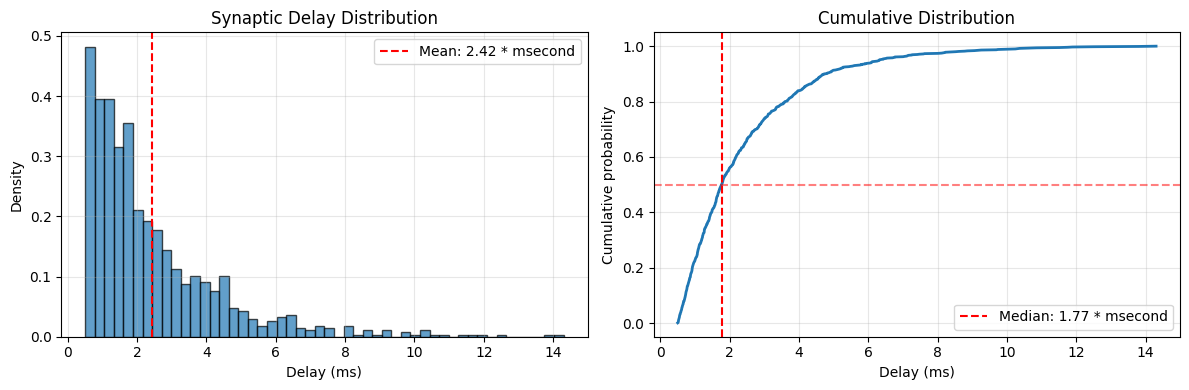

Delay statistics:
  Mean: 2.42 * msecond
  Median: 1.77 * msecond
  Std: 1.98 * msecond
  Range: [0.50 * msecond, 14.30 * msecond]
  Delays < 5 ms: 91.3%


In [23]:
# Synaptic delays often follow exponential distribution
delay_init = init.Exponential(scale=2.0 * u.ms)

# Generate axonal delays
n_connections = 1000
delays = delay_init(n_connections, rng=rng)

# Add a minimum delay (refractory period)
min_delay = 0.5 * u.ms
delays = delays + min_delay

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Histogram
axes[0].hist(delays.mantissa, bins=50, alpha=0.7, edgecolor='black', density=True)
axes[0].axvline(delays.mean().mantissa, color='red', linestyle='--',
                label=f'Mean: {delays.mean():.2f}')
axes[0].set_xlabel(f'Delay ({delays.unit})')
axes[0].set_ylabel('Density')
axes[0].set_title('Synaptic Delay Distribution')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Cumulative distribution
sorted_delays = np.sort(delays.mantissa)
cdf = np.arange(1, len(sorted_delays) + 1) / len(sorted_delays)
axes[1].plot(sorted_delays, cdf, linewidth=2)
axes[1].axhline(0.5, color='red', linestyle='--', alpha=0.5)
axes[1].axvline(u.math.median(delays).mantissa,
                color='red', linestyle='--',
                label=f'Median: {u.math.median(delays):.2f}')
axes[1].set_xlabel(f'Delay ({delays.unit})')
axes[1].set_ylabel('Cumulative probability')
axes[1].set_title('Cumulative Distribution')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Delay statistics:")
print(f"  Mean: {delays.mean():.2f}")
print(f"  Median: {u.math.median(delays):.2f}")
print(f"  Std: {delays.std():.2f}")
print(f"  Range: [{delays.min():.2f}, {delays.max():.2f}]")
print(f"  Delays < 5 ms: {100 * np.sum(delays.mantissa < 5) / n_connections:.1f}%")

## 6. When to Use Each Distribution Type

This section provides practical guidance on choosing the right initialization distribution.

### Decision Guide

| Distribution | When to Use | Advantages | Disadvantages |
|-------------|-------------|------------|---------------|
| **Constant** | Biases only | Simple | Breaks symmetry for weights |
| **Uniform** | Baseline, embeddings | Equal probability, bounded | No special properties |
| **Normal** | General purpose | Well-studied, flexible | Unbounded, can produce outliers |
| **LogNormal** | Positive weights, biological | Positive, skewed, multiplicative | Complex parameter interpretation |
| **Gamma** | Rates, positive values | Flexible shape, positive | Two parameters to tune |
| **Exponential** | Delays, decay | Memoryless property, simple | Only one parameter (scale) |
| **Weibull** | Lifetimes, flexible positive | More flexible than exponential | Two parameters to tune |
| **Beta** | Bounded proportions | Very flexible, bounded | Two parameters to tune |
| **TruncatedNormal** | Bounded with Gaussian properties | Gaussian + bounds | More complex than Normal |

Practical Recommendations

1. For Feed-forward Neural Networks:
- **Start with**: Normal or Uniform
- **Better**: Variance scaling methods (covered in Tutorial 2)
- **Best**: Kaiming/Xavier initialization based on activation function

2. For Recurrent Neural Networks:
- **Start with**: Normal with small std
- **Better**: Orthogonal initialization (covered in Tutorial 2)
- **Best**: Identity initialization + small Normal noise

3. For Biologically Realistic Models:
- **Conductances**: LogNormal or TruncatedNormal
- **Firing rates**: Gamma or LogNormal
- **Delays**: Exponential + minimum delay
- **Probabilities**: Beta distribution

4. For Reinforcement Learning:
- **Policy networks**: Orthogonal for hidden layers, small Normal for output
- **Value networks**: Xavier/Kaiming initialization

5. When You Need:
- **Strictly positive weights**: LogNormal, Gamma, Exponential, Weibull
- **Bounded weights**: Uniform, Beta, TruncatedNormal
- **Symmetric distribution**: Normal, Uniform
- **Heavy tails**: LogNormal, Weibull (shape < 1)
- **Light tails**: TruncatedNormal, Beta, Weibull (shape > 3)

### Comparison Example: All Distributions

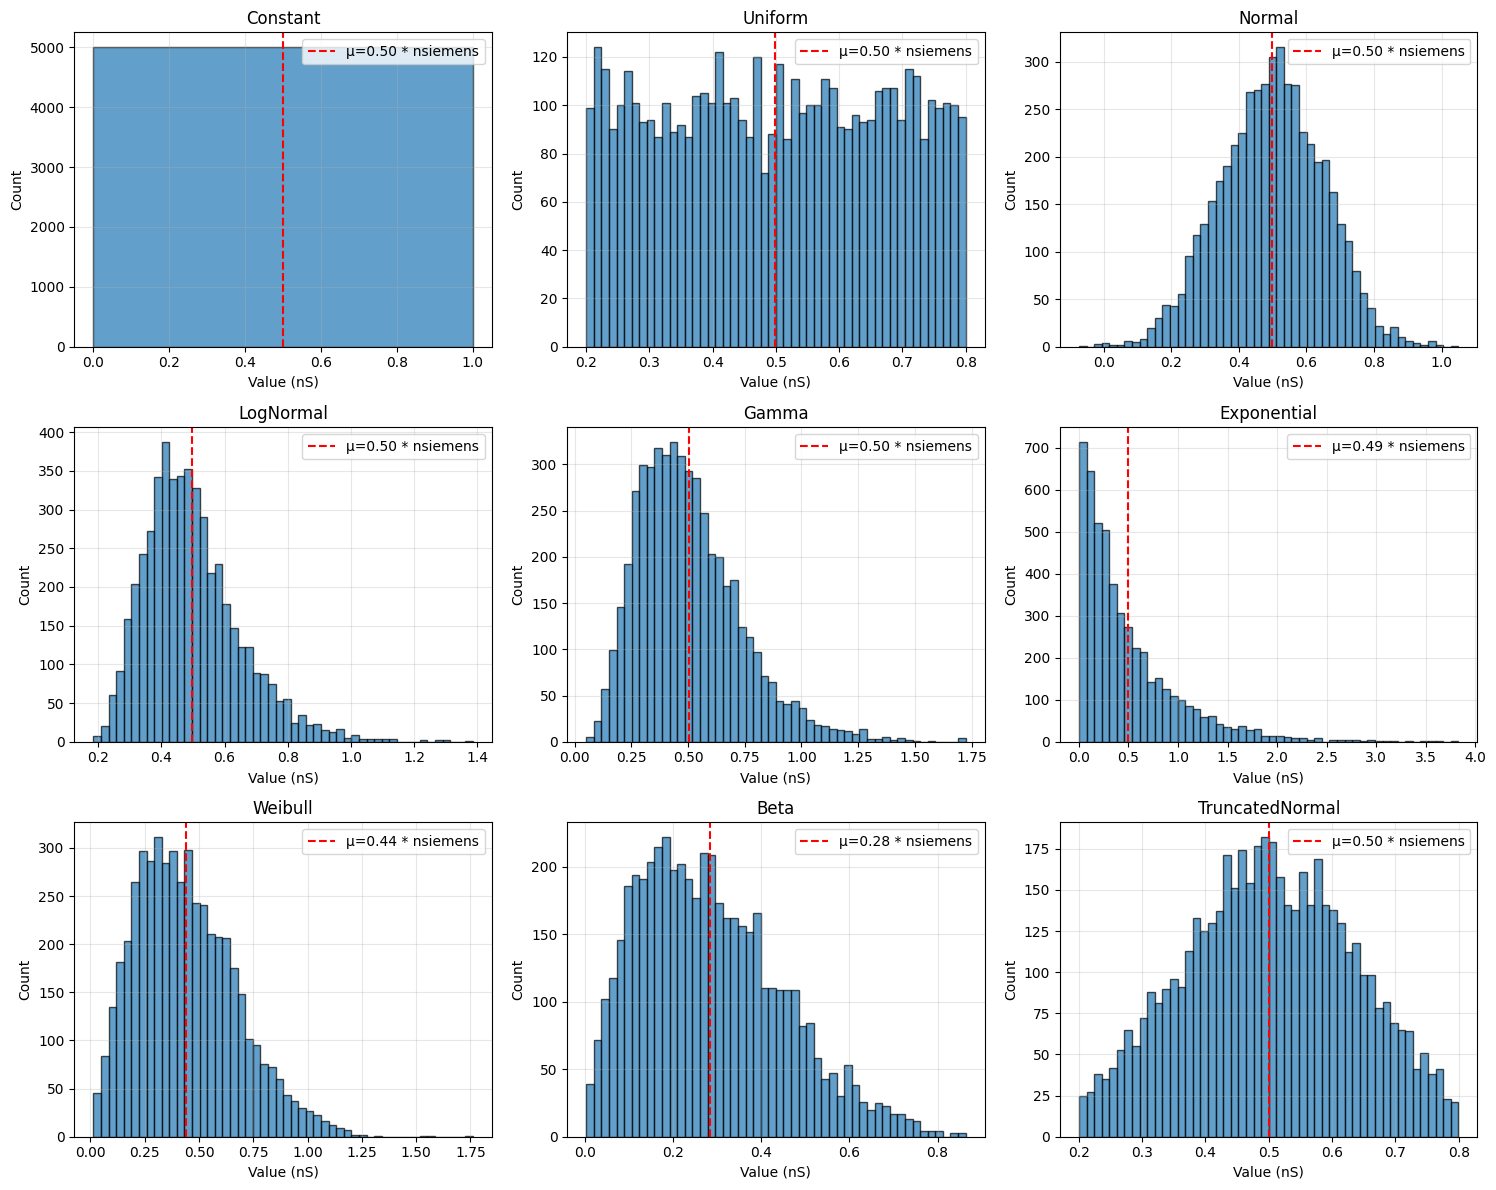


Statistics Comparison:
--------------------------------------------------------------------------------
Distribution         Mean            Std             Min             Max
--------------------------------------------------------------------------------
Constant             0.5 * nsiemens  0. * nsiemens   0.5 * nsiemens  0.5 * nsiemens
Uniform              0.49923182 * nsiemens 0.17418686 * nsiemens 0.20008174 * nsiemens 0.7998049 * nsiemens
Normal               0.49755648 * nsiemens 0.15192363 * nsiemens -0.07359193 * nsiemens 1.0501068 * nsiemens
LogNormal            0.49728495 * nsiemens 0.15124309 * nsiemens 0.18522009 * nsiemens 1.3853562 * nsiemens
Gamma                0.5038246 * nsiemens 0.22819698 * nsiemens 0.05075649 * nsiemens 1.723785 * nsiemens
Exponential          0.4939349 * nsiemens 0.49528977 * nsiemens 0.00043239 * nsiemens 3.8305352 * nsiemens
Weibull              0.43997285 * nsiemens 0.23112014 * nsiemens 0.01325554 * nsiemens 1.7611426 * nsiemens
Beta       

In [24]:
# Create a comprehensive comparison
n_samples = 5000

distributions = {
    'Constant': init.Constant(0.5 * u.nS),
    'Uniform': init.Uniform(0.2 * u.nS, 0.8 * u.nS),
    'Normal': init.Normal(0.5 * u.nS, 0.15 * u.nS),
    'LogNormal': init.LogNormal(0.5 * u.nS, 0.15 * u.nS),
    'Gamma': init.Gamma(5.0, 0.1 * u.nS),
    'Exponential': init.Exponential(0.5 * u.nS),
    'Weibull': init.Weibull(2.0, 0.5 * u.nS),
    'Beta': init.Beta(2.0, 5.0, 0.0 * u.nS, 1.0 * u.nS),
    'TruncatedNormal': init.TruncatedNormal(0.5 * u.nS, 0.15 * u.nS, 0.2 * u.nS, 0.8 * u.nS),
}

# Generate samples
samples = {}
for name, dist in distributions.items():
    if name == 'Constant':
        samples[name] = dist(n_samples)
    else:
        samples[name] = dist(n_samples, rng=rng)

# Visualize all distributions
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

for ax, (name, weights) in zip(axes, samples.items()):
    if name == 'Constant':
        ax.hist(weights.mantissa, bins=1, alpha=0.7, edgecolor='black')
    else:
        ax.hist(weights.mantissa, bins=50, alpha=0.7, edgecolor='black')
    ax.axvline(weights.mean().mantissa, color='red', linestyle='--',
               label=f'μ={weights.mean():.2f}')
    ax.set_xlabel(f'Value ({weights.unit})')
    ax.set_ylabel('Count')
    ax.set_title(name)
    ax.legend()
    ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Statistics table
print("\nStatistics Comparison:")
print("-" * 80)
print(f"{'Distribution':<20} {'Mean':<15} {'Std':<15} {'Min':<15} {'Max'}")
print("-" * 80)
for name, weights in samples.items():
    print(f"{name:<20} {str(weights.mean()):<15} {str(weights.std()):<15} "
          f"{str(weights.min()):<15} {str(weights.max())}")